<a href="https://colab.research.google.com/github/vavana619/quant_machine/blob/main/%5B7%EC%9E%A5%5D_%EC%A0%84%EB%9E%B5%EC%9D%84_%ED%95%A9%EC%84%B1%ED%95%98%EB%8A%94_%EA%B8%B0%EC%88%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 그린블라트의 마법공식 : **좋은 회사의 주식을 싼 가격에 사기**
* 좋은 회사 : 높은 자본수익률(Return of Capital,**ROC** = EBIT/Return of Capital)을 보유
* 싼 가격 : 높은 이익수익률(Earning yield = **PER의 역수**)을 보유

[안전마진이 있는 그레이엄의 NCAV(청산가치) 투자법]
-> 청산가치가 시가총액 1.5 이상인 기업에 투자하는 전략을 제시
  * *안전마진 = 청산가치 - (시가총액 x 1.5) = (유동자산 - 부채) - (시가총액 x 1.5)*



In [1]:
pip install finterstellar

     |████████████████████████████████| 109 kB 5.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [48]:
import finterstellar as fs
OTP = '16501318691189711897'

### 1) 지표 산출

In [3]:
df = fs.fn_single(otp=OTP, symbol='KO', window='T') # 코카콜라(KO) 재무제표 데이터 불러오기

ROC(자본 수익률) 구하기 = EBIT / (총자산 - 유동부채)

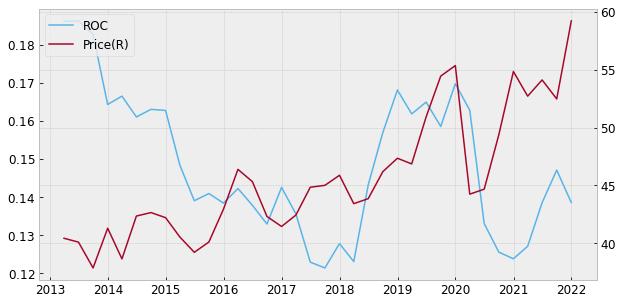

In [6]:
# ROC(자본 수익률) 구하기
df['ROC'] = df['EBIT'] / (df['Total Assets'] - df['Current Liabilities'])
fs.draw_chart(df, left='ROC', right='Price') # 주가와 ROC는 그다지 연관이 있어 보이지 않음

### 2) 마법공식 백테스팅
: 분기 말 기준 3개월 후 리밸런싱하고 그 날짜의 주가를 기준으로 PER을 산출

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 4.18%
Accumulated return: 50.71%
Investment period: 10.0yrs
Sharpe ratio: 0.17
MDD: -53.55%


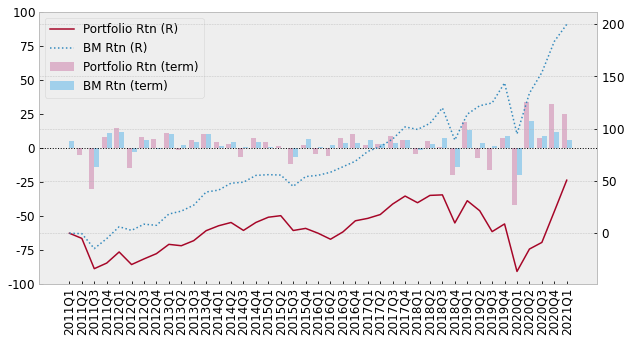

In [7]:
# Magic Formular
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp=OTP, term=t)

s1 = {}
s2 = {}
s = {}
signal = {}

for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS'] # PER의 역수 = 이익 수익률(Earning Yield)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2 # 평균 자산
  data[t]['Avg Current Liabilities'] = (data[t]['Current Liabilities'] + data[prev_t]['Current Liabilities']) / 2 # 현재 평균 부채
  data[t]['ROC'] = data[t]['EBIT'] / (data[t]['Avg Assets'] - data[t]['Avg Current Liabilities']) # EBIT / 투입자본(=자산-부채)

  s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, cap=10, asc=True) # PER 하위권 = 높은 이익 수익률
  s2[t] = fs.fn_score(data[t], by='ROC', method='relative', floor=0, asc=False) # ROC 상위권 = 높은 자본수익률
  s[t] = fs.combine_score(s1[t], s2[t], n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001, rf_rate=.01) # rf_rate : 샤프비율을 계산할 때 이용
fs.draw_return(df)

-> 생각보다 좋은 결과는 X, 벤치마크인 S&P 500 지수보다도 못한 수익률

### 3) "할 수 있다 퀀트투자"의 저자 강환국이 제안한 developed 마법공식
* PER(주가수익비율) -> PBR(주가순자산비율)
* ROC(자본 수익률) -> GP/A(매출 총 이익 / 총 자산)

CAGR: 20.60%
Accumulated return: 551.86%
Investment period: 10.0yrs
Sharpe ratio: 1.42
MDD: -46.00%


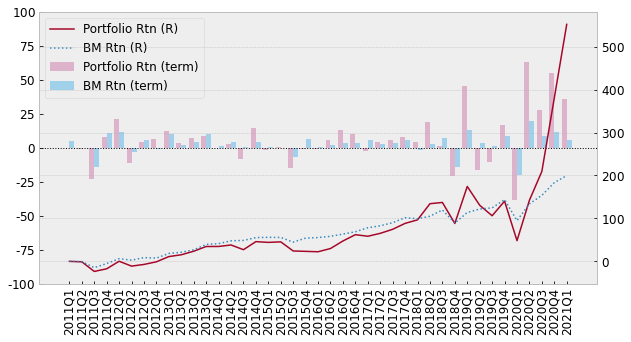

In [8]:
# PBR + GP/A
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
s1 = {}
s2 = {}
signal = {}

for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares']) # 주가순자산비율
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2 # 평균 자산
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets'] # 매출 총이익 / 총 자산

  s1[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, cap=2, asc=True) # PBR 하위권 (마법 공식에서는 하위권 사용)
  s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False) # GP/A 상위권
  s[t] = fs.combine_score(s1[t], s2[t], n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001, rf_rate=.01)
fs.draw_return(df)

-> 그린블라트의 마법공식보다 훨씬 높은 수익률을 보여줌 (노비막스의 마법공식이 그린블라이트의 마법공식보다 수익률이 더 좋은 것을 볼 수 있음)

# 2. F 스코어
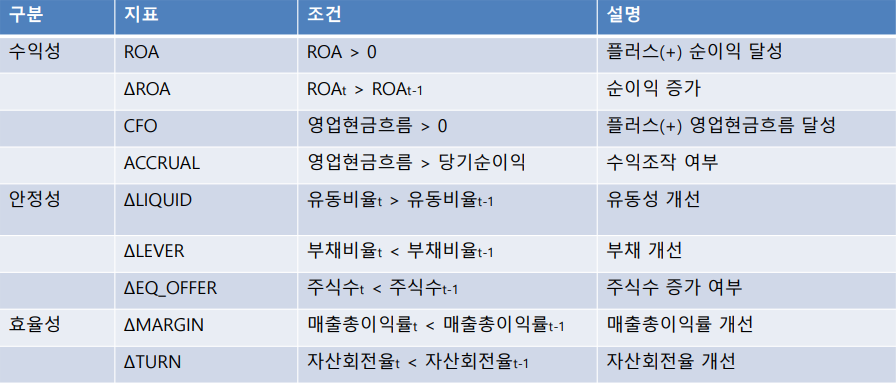
* 각 지표마다 해당 조건을 충족하면 1점, 아니면 0점을 부과 (최대 9점)
* F score가 높을수록 우량주라고 판단


### 1) 지표산출

In [9]:
df = fs.fn_single(otp=OTP, symbol='FB', window='T') # 페이스북(FB) 재무제표 데이터 불러오기

In [10]:
# F Score를 계산하기 위한 factor 계산
df['Avg Assets'] = (df['Total Assets'] + df['Total Assets'].shift(4)) / 2
df['ROA'] = df['Net Income'] / df['Avg Assets']
df['Current Ratio'] = df['Current Assets'] / df['Current Liabilities']
df['Debt/Asset'] = df['Long Term Debt'] / df['Total Assets']
df['Gross Margin'] = df['Gross Profit'] / df['Revenue']
df['Asset Turnover'] = df['Revenue'] / df['Avg Assets']

In [11]:
# F Score 초기화
df['F_ROA'] = 0 # 순이익 흑자 달성
df['F_ROA_dt'] = 0 # 순이익 증가
df['F_CFO'] = 0 # 영업현금흐름 흑자 달성
df['F_Accrual'] = 0 # 수익조작 여부
df['F_Liquid'] = 0 # 유동성 개선
df['F_Lever'] = 0 # 부채 개선
df['F_Shares'] = 0 # 주식수 증가 여부
df['F_Margin'] = 0 # 매출총이익률 개선
df['F_Turn'] = 0 # 자산회전율 개선

df['F_Score'] = 0 # 총점

In [12]:
# F Score 계산
df.loc[df['ROA'] > 0, 'F_ROA'] = 1 # 순이익 흑자 달성
df.loc[df['ROA']>df['ROA'].shift(4), 'F_ROA_dt'] = 1 # 순이익 증가
df.loc[df['Operating Cash Flow']>0, 'F_CFO'] = 1 # 영업현금흐름 흑자 달성
df.loc[df['Operating Cash Flow']-df['Net Income']>0, 'F_Accrual'] = 1  # 수익조작 여부
df.loc[df['Current Ratio']-df['Current Ratio'].shift(4)>0, 'F_Liquid'] = 1 # 유동성 개선
df.loc[df['Debt/Asset']-df['Debt/Asset'].shift(4)<0, 'F_Lever'] = 1 # 부채 개선
df.loc[df['Shares']-df['Shares'].shift(4)<=0, 'F_Shares'] = 1 # 주식수 증가 여부
df.loc[df['Gross Margin']-df['Gross Margin'].shift(4)>0, 'F_Margin'] = 1 # 매출총이익률 개선
df.loc[df['Asset Turnover']-df['Asset Turnover'].shift(4)>0, 'F_Turn'] = 1 # 자산회전율 개션
df['F_Score'] = df['F_ROA']+df['F_ROA_dt']+df['F_CFO']+df['F_Accrual']+df['F_Liquid']+df['F_Lever']+df['F_Shares']+df['F_Margin']+df['F_Turn'] # 총점

In [13]:
# F Score 예시
df[['F_Score', 'F_ROA', 'F_ROA_dt', 'F_CFO', 'F_Accrual', 'F_Liquid', 'F_Lever', 'F_Shares', 'F_Margin', 'F_Turn']].tail()

,F_Score,F_ROA,F_ROA_dt,F_CFO,F_Accrual,F_Liquid,F_Lever,F_Shares,F_Margin,F_Turn
2020-12-31,7,1,1,1,1,1,1,1,0,0
2021-03-31,8,1,1,1,1,1,1,1,0,1
2021-06-30,7,1,1,1,1,0,1,1,0,1
2021-09-30,6,1,1,1,1,0,0,1,0,1
2021-12-31,7,1,1,1,1,0,0,1,1,1


### 2) 백테스팅
: 소형주(시가총액 하위 20% 종목) 중 PBR이 0.1 이상 1 이하인 저평가 종목을 대상으로 포트폴리오를 구성

In [26]:
# Piotroski 준비작업
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp=OTP, term=t, vol=0) # 유동성 고려 X, 일평균 거래량 기준을 0으로 설정 (vol=0)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


* 추가 팩터 생성
* F score 지표 초기화
* F score 지표 계산
* F score 총점 계산

In [27]:
for t in terms:
    prev_t = fs.quarters_before(terms, t, 4) # 과거 비교대상 : 4분기

    # F Score 계산을 위한 팩터 생성
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['PBR'] = data[t]['Price_M3'] / ( data[t]['Shareholders Equity'] / data[t]['Shares'] )
    data[t]['Avg Assets'] =  ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2
    data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets']
    data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities']
    data[t]['Debt/Asset'] = data[t]['Long Term Debt'] / data[t]['Total Assets']
    data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue']
    data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets']
    
    # F Score 지표 초기화
    data[t]['F_ROA'] = 0 # 순이익 흑자 달성
    data[t]['F_ROA_dt'] = 0 # 순이익 증가
    data[t]['F_CFO'] = 0 # 영업현금흐름 흑자 달성
    data[t]['F_Accrual'] = 0 # 수익조작 여부
    data[t]['F_Liquid'] = 0 # 유동성 개선
    data[t]['F_Lever'] = 0 # 부채 개선
    data[t]['F_Shares'] = 0 # 주식수 증가 여부
    data[t]['F_Margin'] = 0 # 매출총이익률 개선
    data[t]['F_Turn'] = 0 # 자산회전율 개선

    data[t]['F_Score'] = 0 # 총점
    
    # F Score 지표 계산
    data[t].loc[data[t]['ROA']>0, 'F_ROA'] = 1 # 순이익 흑자 달성
    data[t].loc[data[t]['ROA']-data[prev_t]['ROA']>0, 'F_ROA_dt'] = 1 # 순이익 증가
    data[t].loc[data[t]['Operating Cash Flow']>0, 'F_CFO'] = 1 # 영업현금흐름 흑자 달성
    data[t].loc[data[t]['Operating Cash Flow']-data[t]['Net Income']>0, 'F_Accrual'] = 1 # 수익조작 여부
    data[t].loc[data[t]['Current Ratio']-data[prev_t]['Current Ratio']>0, 'F_Liquid'] = 1 # 유동성 개선
    data[t].loc[data[t]['Debt/Asset']-data[prev_t]['Debt/Asset']<0, 'F_Lever'] = 1 # 부채 개선
    data[t].loc[data[t]['Shares']-data[prev_t]['Shares']<=0, 'F_Shares'] = 1 # 주식수 증가 여부
    data[t].loc[data[t]['Gross Margin']-data[prev_t]['Gross Margin']>0, 'F_Margin'] = 1 # 매출총이익률 개선
    data[t].loc[data[t]['Asset Turnover']-data[prev_t]['Asset Turnover']>0, 'F_Turn'] = 1 # 자산회전율 개선

    data[t]['F_Score'] = (data[t]['F_ROA']+data[t]['F_ROA_dt']+data[t]['F_CFO']+data[t]['F_Accrual']+data[t]['F_Liquid']+data[t]['F_Lever']+data[t]['F_Shares']+data[t]['F_Margin']+data[t]['F_Turn']) # 총점

CAGR: 13.97%
Accumulated return: 270.23%
Investment period: 10.0yrs
Sharpe ratio: 1.54
MDD: -18.30%


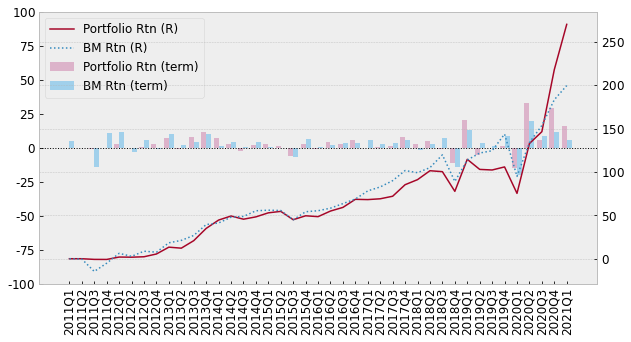

In [28]:
# HIgh F-Score (7점~9점)
s2 = {}
s3 = {}
s = {}
signal = {}
for t in terms:
    s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True) # 시총 0~1000인 기업(소형주)
    s2[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, asc=True)
    s3[t] = fs.fn_filter(data[t], by='F_Score', floor=7, cap=9, asc=False) # F스코어가 7 이상 9 이하인 종목 선택
    s[t] = fs.combine_signal(s1[t], s2[t], s3[t]).sample(frac=1)[:30] # 선택된 종목을 합성 후 30개만 골라냄
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 종목을 랜덤하게 선정했기 때문에 실행할 때마다 결괏값이 다름
fs.draw_return(df)

###  dataframe sample 함수의 용법

In [18]:
import pandas as pd

data = {
    'Name' : ['Microsoft Corporation', 'Google LLC', 'Tesla, Inc.', 'Apple Inc.', 'Netflix, Inc.'],
    'Symbol' : ['MSFT', 'GOOG', 'TSLA', 'AAPL', 'NFLX'],
    'Shares' : [100, 50, 150, 200, 80] # 주
}

df = pd.DataFrame(data)
df

,Name,Symbol,Shares
0,Microsoft Corporation,MSFT,100
1,Google LLC,GOOG,50
2,"Tesla, Inc.",TSLA,150
3,Apple Inc.,AAPL,200
4,"Netflix, Inc.",NFLX,80


In [20]:
df_sub = df.sample(frac=0.67)
print(df_sub) # 5개에서 3개 나옴

                    Name Symbol  Shares
0  Microsoft Corporation   MSFT     100
1             Google LLC   GOOG      50
3             Apple Inc.   AAPL     200


In [21]:
df_sub = df.sample(frac=0.67)
print(df_sub) # 5개에서 3개 나옴

                    Name Symbol  Shares
0  Microsoft Corporation   MSFT     100
4          Netflix, Inc.   NFLX      80
3             Apple Inc.   AAPL     200


In [22]:
df_sub = df.sample(frac=1) # 100% 다 가지고 옴
print(df_sub) # 5개에서 3개 나옴

                    Name Symbol  Shares
2            Tesla, Inc.   TSLA     150
3             Apple Inc.   AAPL     200
1             Google LLC   GOOG      50
4          Netflix, Inc.   NFLX      80
0  Microsoft Corporation   MSFT     100


In [23]:
df_sub = df.sample(frac=1) # 100% 다 가지고 옴
print(df_sub) # 5개에서 3개 나옴

                    Name Symbol  Shares
2            Tesla, Inc.   TSLA     150
3             Apple Inc.   AAPL     200
0  Microsoft Corporation   MSFT     100
4          Netflix, Inc.   NFLX      80
1             Google LLC   GOOG      50


CAGR: 26.17%
Accumulated return: 924.39%
Investment period: 10.0yrs
Sharpe ratio: 3.50
MDD: -25.61%


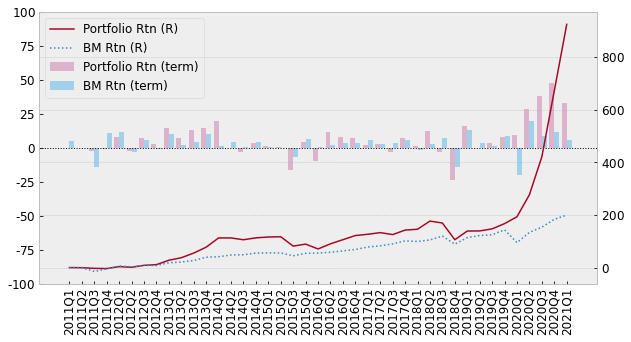

In [29]:
# Mid F-Score 백테스팅 (4점~6점)
s1 = {}
s2 = {}
s3 = {}
s = {}
signal = {}
for t in terms:
    s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s2[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, asc=True)
    s3[t] = fs.fn_filter(data[t], by='F_Score', floor=4, cap=6, asc=False)
    s[t] = fs.combine_signal(s1[t], s2[t], s3[t]).sample(frac=1)[:30]
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 27.40%
Accumulated return: 1028.55%
Investment period: 10.0yrs
Sharpe ratio: 3.01
MDD: -26.75%


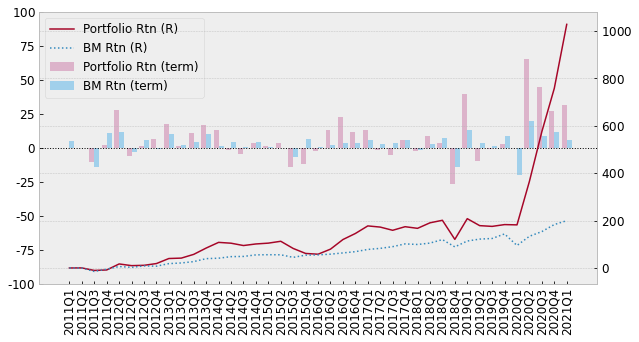

In [30]:
# Low F-Score 백테스팅 (0점~3점)
s1 = {}
s2 = {}
s3 = {}
s = {}
signal = {}
for t in terms:
    s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s2[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, asc=True)
    s3[t] = fs.fn_filter(data[t], by='F_Score', floor=0, cap=3, asc=False)
    s[t] = fs.combine_signal(s1[t], s2[t], s3[t]).sample(frac=1)[:30]
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

-> 책의 실습과는 달리 F score가 낮을수록 더 좋은 수익률을 보여줌

# 3. 전략 실행을 위한 필수 조건, 유동성

In [31]:
# 평균 거래량(유동성) -> 기본 거래량 = 10만주 이상
data = fs.fn_consolidated(otp=OTP, term='2020Q4') # 2020년 4분기 재무데이터 불러오기
data['avg_volume'] # 평균 거래량

2020Q4...OK


symbol
A        1583030
AA       4514200
AADI      100513
AAIC      195900
AAL     54210000
          ...   
ZUO      1440630
ZVO       527933
ZWS       703667
ZYME      321367
ZYXI      825697
Name: avg_volume, Length: 3230, dtype: int64

In [32]:
# 평균 거래량(유동성 고려 X) = 0주 이상
data = fs.fn_consolidated(otp=OTP, term='2020Q4', vol=0)
data['avg_volume'] # Length가 차이남

2020Q4...OK


symbol
A       1583030
AA      4514200
AACG      23233
AADI     100513
AAIC     195900
         ...   
ZUO     1440630
ZVO      527933
ZWS      703667
ZYME     321367
ZYXI     825697
Name: avg_volume, Length: 4234, dtype: int64

In [33]:
# 평균 거래량(유동성을 강하게 고려)
data = fs.fn_consolidated(otp=OTP, term='2020Q4', vol=1000000) # 일평균거래량을 '100만주 이상'으로 설정
data['avg_volume'] 

2020Q4...OK


symbol
A         1583030
AA        4514200
AAL      54210000
AAPL    186217000
ABB       1482000
          ...    
ZS        3182870
ZSAN      4593800
ZTO       3821430
ZTS       1792600
ZUO       1440630
Name: avg_volume, Length: 1274, dtype: int64

### 1) 백테스팅 - 중유동주(10만 volume)

In [40]:
# finterstellar
# Set test terms by fiscal years
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=OTP, term=t)

for t in terms:
    # Set previous terms
    prev_t = fs.quarters_before(terms, t, 4)

    # Company size
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 시가총액

    # Value
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS'] # 주가수익비율
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares']) # 주가순자산비율
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares']) # 주가매출비율
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] ) # 주가현금흐름비율

    # Profitability
    data[t]['Avg Assets'] = ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2 # 평균 자산
    data[t]['Avg Equity'] = ( data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity'] ) / 2 # 평균 자본
    data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets'] # 자산대비이익
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'ROA'] = float('nan')
    data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity'] # 자본대비이익
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Equity']<0) | (data[t]['Shareholders Equity']<0), 'ROE'] = float('nan')
    data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets'] # 자산대비 영업효율
    data[t].loc[(data[t]['Gross Profit']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'GP/A'] = float('nan') 
    data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity'] # 자본대비 영업효율

    # Stability
    data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity'] # 부채비율
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Liability/Equity'] = float('nan')
    data[t]['Debt/Equity'] = (data[t]['Long Term Debt'] + data[t]['Current Debt']) / data[t]['Shareholders Equity'] # 차입금비율
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Debt/Equity'] = float('nan')
    data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities'] # 현재 부채 대비 자산
    data[t]['Share Increase'] =  data[t]['Shares'] / data[prev_t]['Shares'] # 주식수 증가율

    # Efficiency
    data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue'] # 매출 총이익률
    data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets'] # 총자산 회전율
    data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity'] # 총자본 회전율

    # Momentum
    data[t]['Price Growth'] =  data[t]['Price_M3'] / data[prev_t]['Price_M3'] # 주가 성장률

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [41]:
# GP/E + 소형주 + 증자X + 중유동주
s1 = {}
s2 = {}
s3 = {}
s = {}
signal = {}

for t in terms:
    s1[t] = fs.fn_score(data[t], by='GP/E', method='relative', floor=0, asc=False)    
    s2[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s3[t] = fs.fn_filter(data[t], by='Share Increase', floor=.9, cap=1)
    s[t] = fs.combine_signal(s1[t], s2[t], s3[t], how='and', n=30)
    signal[t] = list(s[t].index)
    
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 13.13%
Accumulated return: 243.77%
Investment period: 10.0yrs
Sharpe ratio: 0.84
MDD: -56.03%


### 2) 백테스팅 - 고유동주(100만 volume)

In [42]:
# finterstellar
# Set test terms by fiscal years
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=OTP, term=t, vol=1000000) # 100만 주 기준으로 백테스팅

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [44]:
for t in terms:
    # Set previous terms
    prev_t = fs.quarters_before(terms, t, 4)

    # Company size
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 시가총액

    # Value
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS'] # 주가수익비율
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares']) # 주가순자산비율
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares']) # 주가매출비율
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] ) # 주가현금흐름비율

    # Profitability
    data[t]['Avg Assets'] = ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2 # 평균 자산
    data[t]['Avg Equity'] = ( data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity'] ) / 2 # 평균 자본
    data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets'] # 자산대비이익
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'ROA'] = float('nan')
    data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity'] # 자본대비이익
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Equity']<0) | (data[t]['Shareholders Equity']<0), 'ROE'] = float('nan')
    data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets'] # 자산대비 영업효율
    data[t].loc[(data[t]['Gross Profit']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'GP/A'] = float('nan') 
    data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity'] # 자본대비 영업효율

    # Stability
    data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity'] # 부채비율
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Liability/Equity'] = float('nan')
    data[t]['Debt/Equity'] = (data[t]['Long Term Debt'] + data[t]['Current Debt']) / data[t]['Shareholders Equity'] # 차입금비율
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Debt/Equity'] = float('nan')
    data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities'] # 현재 부채 대비 자산
    data[t]['Share Increase'] =  data[t]['Shares'] / data[prev_t]['Shares'] # 주식수 증가율

    # Efficiency
    data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue'] # 매출 총이익률
    data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets'] # 총자산 회전율
    data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity'] # 총자본 회전율

    # Momentum
    data[t]['Price Growth'] =  data[t]['Price_M3'] / data[prev_t]['Price_M3'] # 주가 성장률

CAGR: 12.84%
Accumulated return: 235.11%
Investment period: 10.0yrs
Sharpe ratio: 1.30
MDD: -29.72%


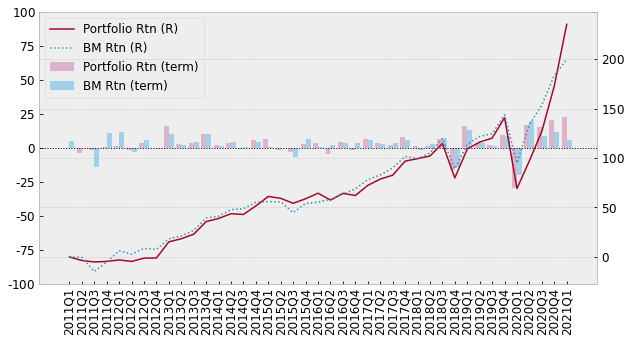

In [45]:
# GP/E + 소형주 + 증자X + 고유동주(100만 volume)
s1 = {}
s2 = {}
s3 = {}
s = {}
signal = {}

for t in terms:
    s1[t] = fs.fn_score(data[t], by='GP/E', method='relative', floor=0, asc=False)    
    s2[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s3[t] = fs.fn_filter(data[t], by='Share Increase', floor=.9, cap=1)
    s[t] = fs.combine_signal(s1[t], s2[t], s3[t], how='and', n=30)
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

-> 기본값이 10만 주로 했을 때보다 수익률이 줄었음

# 4. 세상에 없던 나만의 투자 전략 만들기
* 가치투자 4대장 콤보 + 소형주
* (4대장 + GP/A + 부채비율 + 유동비율) + 소형주 + 증자X
* (4대장 + GP/A + 부채비율 + 유동비율) + 소형주 + 증자X + 모멘텀
* GP/A + 소형주 + 증자X
* 자산회전율 + GP/A + 소형주

### 1) 백테스팅-중유동주(10만 volume)

In [51]:
# finterstellar
# Set test terms by fiscal years
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=OTP, term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [52]:
for t in terms:
    # Set previous terms
    prev_t = fs.quarters_before(terms, t, 4)

    # Company size
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 시가총액

    # Value
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS'] # 주가수익비율
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares']) # 주가순자산비율
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares']) # 주가매출비율
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] ) # 주가현금흐름비율

    # Profitability
    data[t]['Avg Assets'] = ( data[t]['Total Assets'] + data[prev_t]['Total Assets'] ) / 2 # 평균 자산
    data[t]['Avg Equity'] = ( data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity'] ) / 2 # 평균 자본
    data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets'] # 자산대비이익
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'ROA'] = float('nan')
    data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity'] # 자본대비이익
    data[t].loc[(data[t]['Net Income']<0) | (data[t]['Avg Equity']<0) | (data[t]['Shareholders Equity']<0), 'ROE'] = float('nan')
    data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets'] # 자산대비 영업효율
    data[t].loc[(data[t]['Gross Profit']<0) | (data[t]['Avg Assets']<0) | (data[t]['Total Assets']<0), 'GP/A'] = float('nan') 
    data[t]['GP/E'] = data[t]['Gross Profit'] / data[t]['Avg Equity'] # 자본대비 영업효율

    # Stability
    data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity'] # 부채비율
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Liability/Equity'] = float('nan')
    data[t]['Debt/Equity'] = (data[t]['Long Term Debt'] + data[t]['Current Debt']) / data[t]['Shareholders Equity'] # 차입금비율
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Debt/Equity'] = float('nan')
    data[t]['Current Ratio'] = data[t]['Current Assets'] / data[t]['Current Liabilities'] # 현재 부채 대비 자산
    data[t]['Share Increase'] =  data[t]['Shares'] / data[prev_t]['Shares'] # 주식수 증가율

    # Efficiency
    data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue'] # 매출 총이익률
    data[t]['Asset Turnover'] = data[t]['Revenue'] / data[t]['Avg Assets'] # 총자산 회전율
    data[t]['Equity Turnover'] = data[t]['Revenue'] / data[t]['Avg Equity'] # 총자본 회전율

    # Momentum
    data[t]['Price Growth'] =  data[t]['Price_M3'] / data[prev_t]['Price_M3'] # 주가 성장률

### 2) 백테스팅 - 가치투자 4대장 콤보 + 소형주

CAGR: 11.43%
Accumulated return: 195.51%
Investment period: 10.0yrs
Sharpe ratio: 0.63
MDD: -48.92%


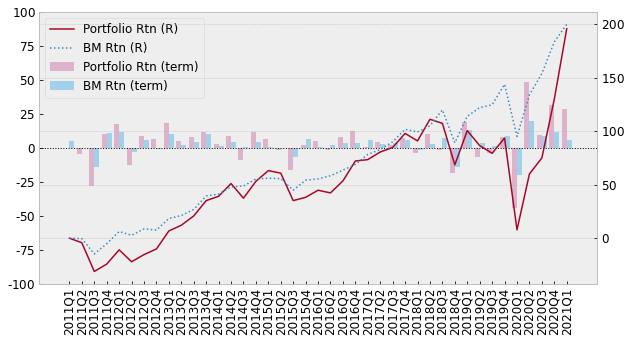

In [53]:
# 가치투자 4대장 콤보 + 소형주
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s6 = {}
s = {}
signal = {}

for t in terms:
    s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
    s2[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
    s3[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
    s4[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True) 
    s5[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s6[t] = fs.combine_score(s1[t], s2[t], s3[t], s4[t])
    s[t] = fs.combine_signal(s6[t], s5[t], how='and', n=50)
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 성과는 그다지 좋지 않음
fs.draw_return(df)

### 3) 백테스팅 - (4대장 + GP/A + 부채비율 + 유동비율) + 소형주 + 증자X

CAGR: 9.73%
Accumulated return: 153.36%
Investment period: 10.0yrs
Sharpe ratio: 0.57
MDD: -50.55%


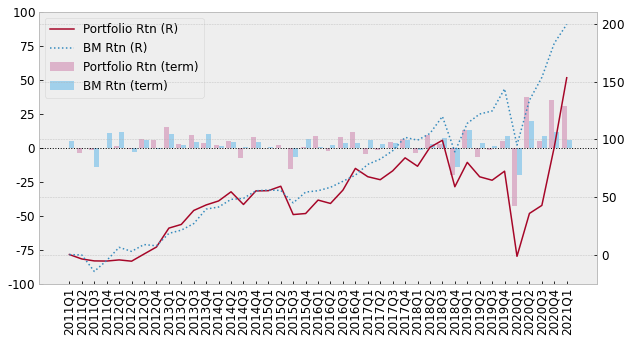

In [54]:
# (4대장 + GP/A + 부채비율 + 유동비율) + 소형주 + 증자X
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s6 = {}
s7 = {}
s8 = {}
s9 = {}
s10 = {}
s11 = {}
s = {}
signal = {}

for t in terms:
    s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
    s2[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
    s3[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
    s4[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True) 
    s5[t] = fs.fn_score(data[t], by='ROE', method='relative', floor=0, asc=False) # 높을수록 좋기 때문에 내림차순
    s6[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False) # 높을수록 좋기 때문에 내림차순
    s7[t] = fs.fn_score(data[t], by='Debt/Equity', method='relative', floor=0, asc=True)
    s8[t] = fs.fn_score(data[t], by='Current Ratio', method='relative', floor=0, asc=False)
    s9[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True) # 소형주
    s10[t] = fs.fn_filter(data[t], by='Share Increase', floor=.9, cap=1) # 증자 X
    s11[t] = fs.combine_score(s1[t], s2[t], s3[t], s4[t], s5[t], s6[t], s7[t], s8[t])
    s[t] = fs.combine_signal(s11[t], s9[t], s10[t], how='and', n=50)
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

### 4) 백테스팅 - (4대장 + GP/E + 부채비율 + 유동비율) + 소형주 + 증자X + 모멘텀

CAGR: 6.66%
Accumulated return: 90.70%
Investment period: 10.0yrs
Sharpe ratio: 0.48
MDD: -43.38%


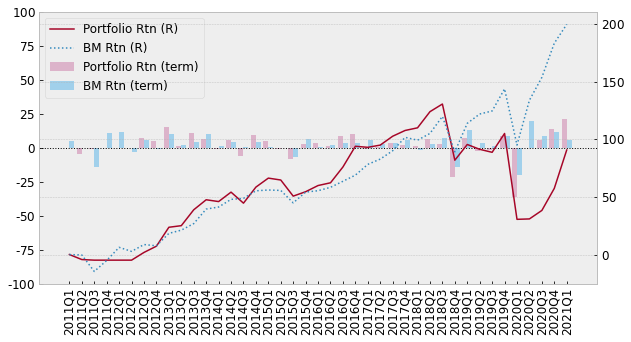

In [55]:
# (4대장 + GP/E + 부채비율 + 유동비율) + 소형주 + 증자X + 모멘텀
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s6 = {}
s7 = {}
s8 = {}
s9 = {}
s10 = {}
s11 = {}
s12 = {}
s = {}
signal = {}

for t in terms:
    s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
    s2[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
    s3[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
    s4[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True) 
    s5[t] = fs.fn_score(data[t], by='ROE', method='relative', floor=0, asc=False) 
    s6[t] = fs.fn_score(data[t], by='GP/E', method='relative', floor=0, asc=False)   
    s7[t] = fs.fn_score(data[t], by='Debt/Equity', method='relative', floor=0, asc=True)
    s8[t] = fs.fn_score(data[t], by='Current Ratio', method='relative', floor=0, asc=False)
    s9[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s10[t] = fs.fn_filter(data[t], by='Share Increase', floor=.9, cap=1)
    s11[t] = fs.fn_filter(data[t], by='Price Growth', floor=1) # 모멘텀
    s12[t] = fs.combine_score(s1[t], s2[t], s3[t], s4[t], s5[t], s6[t], s7[t], s8[t])
    s[t] = fs.combine_signal(s12[t], s9[t], s10[t], s11[t], how='and', n=50)
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

### 5) 백테스팅 - GP/A + 소형주 + 증자X

CAGR: 10.07%
Accumulated return: 161.12%
Investment period: 10.0yrs
Sharpe ratio: 0.62
MDD: -49.04%


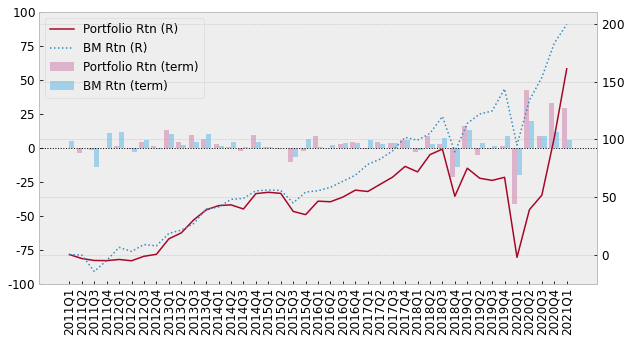

In [56]:
# GP/A + 소형주 + 증자X
s1 = {}
s2 = {}
s3 = {}
s = {}
signal = {}

for t in terms:
    s1[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)    
    s2[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s3[t] = fs.fn_filter(data[t], by='Share Increase', floor=.9, cap=1)
    s[t] = fs.combine_signal(s1[t], s2[t], s3[t], how='and', n=50)
    signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # GP/A만 가져왔더니 다른 지표들을 막 섞은 것보다 깔끔함 
fs.draw_return(df)

### 6) 백테스팅 - 자산회전율 + GP/A + 소형주

In [57]:
# 자산회전율 + GP/A + 소형주
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s = {}
signal = {}

for t in terms:
    s1[t] = fs.fn_score(data[t], by='Asset Turnover', method='relative', floor=0, asc=False)   
    s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)   
    s3[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s5[t] = fs.combine_score(s1[t], s2[t])
    s[t] = fs.combine_signal(s5[t], s3[t], how='and', n=50)
    signal[t] = list(s[t].index)
    
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)    

CAGR: 16.40%
Accumulated return: 357.00%
Investment period: 10.0yrs
Sharpe ratio: 1.20
MDD: -38.02%


-> 활동성 높은 기업에 GP/A를 더하니 괜찮은 성과를 거둘 수 있었음